<a href="https://colab.research.google.com/github/jcgalvisa/NA/blob/main/PuntoFlotante/PuntoFlotanteAN2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algunos ejemplos  con números de máquina

Presentamos ilustraciones simples de cálculo con números de máquina y redondeo. Usaremos los modulos [numpy](https://numpy.org/) and [math](https://docs.python.org/3/library/math.html).

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

En python tenemos el tipo de dato **float** que corresponde al formato de punto flotante de 64 bits (8 Bytes) parecido al estudiado en clase. 

In [ ]:
x=math.pi
print(type(x))

<class 'float'>


En Python podemos formatear  cuando imprimimos datos de punto flotante. Por ejemplo. 

In [ ]:
x=4*np.pi
y=5E+15*np.pi**9
print('x= {:10.2f}, x = {:.20f}, y = {:.6e}'.format(x, x, y))
print('x= {:2.4e}, x = {:.3E}'.format(x, x, y))

x=      12.57, x = 12.56637061435917246399, y = 1.490455e+20
x= 1.2566e+01, x = 1.257E+01


Tambien podemos proceder como sigue.

In [ ]:
print( 'x=%.2f y y=%.2g'%(x,y))

x=12.57 y y=1.5e+20


Debemos tener cuidado al comparar dos variables de tipo float en condiciones para control condicional o control iterativo. Considere los siguientes ejemplos. 
 

In [ ]:
0.1+0.1==0.2

True

In [ ]:
0.1+0.1+.1==0.3

False

In [ ]:
np.abs(0.1+0.1+0.1-0.3)<0.0000000000000001

True

 Veamos que pasa si intentamos sumar $x=1/10$ varias veces, esto es, $\sum_{i=1}^N 0.1$. Veamos la siguiente implementación.

In [ ]:
s=0
n=np.power(10,6)
sumas=0.0
for i in range(0,n):
  s=s+(1/10) # note que se suma n veces pues ya en 0 suma una vez.
  sumas=sumas+1
print('Despues de ',sumas, ' sumas de 1/10, el resultado es',s)
x=1/10
p=n*x
print('El producto es : ',p)

Despues de  1000000.0  sumas de 1/10, el resultado es 100000.00000133288
El producto es :  100000.0


Calculemos el error relativo de la aproximación anterior.


In [ ]:
err=np.abs((s-p)/p)
print(100*err,'%')

1.3328826753422618e-09 %


Este ejemplo puede ser considerado como un ejemplo de un algoritmo inestable para calcular $\sum_{i=1}^N 0.1$.

Recuerde que tenemos redondedo con 15 o 16 decimales exactos. Más precisión que eso no se puede garantizar. Observe por ejemplo el siguiente código, 

In [ ]:
x=np.pi
print(type(x))
print("x={0:.20f}".format(x))

<class 'float'>
x=3.14159265358979311600


Veamos  numéros de máquina positivos pequeños y algunas operaciones.

In [ ]:
x=3E-324
y=2E-324
print('x=',x,'es un numero de maquina. Pero y=2E-324 es aproximado  a  y=',y)
print('Al dividir x=3E-324 por dos tenemos x/2=',x/2)
print('Note tambien que 1/x=',1/x)

x= 5e-324 es un numero de maquina. Pero y=2E-324 es aproximado  a  y= 0.0
Al dividir x=3E-324 por dos tenemos x/2= 0.0
Note tambien que 1/x= inf


Ahora numéros positivos grandes.

In [ ]:
x=1E+308
y=2E+309
print('x=',x,'es un numéro de maquina pero  y=2E+309 es transformado en  y=',y)
print('Note que 1/x=',1/x, ' y también  1/y=',1/y)

x= 1e+308 es un numéro de maquina pero  y=2E+309 es transformado en  y= inf
Note que 1/x= 1e-308  y también  1/y= 0.0


Verificamos ahora la no-asociatividad de la suma en el siguiente ejemplo.





In [ ]:
x=1E+26-1E+26+1
y=1E+26+1-1E+26
print('x= ',x, ' diferente de   y=',y)

x=  1.0  diferente de   y= 0.0


Considere tambien el siguiente ejemplo.

In [ ]:
a=1E+308
b=1.1E+308
c=-1.001E+308
x=a+(b+c)
#y=(a+b)+c
#y=a**2
print('x=',x,' que es diferente a  y=',y)

OverflowError: ignored

Otro ejemplo es el de calcular $\sqrt{a^2+b^2}$ con $a=$1E+200 y $b=1$.

In [ ]:
a=1E+200
b=1
y=np.sqrt( a**2+b**2)
print(y)


OverflowError: ignored

Podemos evitar el desbordamiento por exceso.


In [ ]:
z=a*np.sqrt( 1+(b/a)**2)
print(z)

1e+200


Algunas expresiones ideterminadas con las que se debe tener cuidado a la hora de calcular con punto flotante.


In [ ]:
x=1
y=0
z=1E+320
w=1E+330
print('x= ',x,', y=',y,', z=',z,', w=',w)
print('Inf/Inf=',w/z)
print('Inf*Inf=',w*z)
print('1/nan=', 1/(w/z))
print('nan*1=',(w/z)*1)
print('sqrt(nan)=',np.sqrt((w/z)))

x=  1 , y= 0 , z= inf , w= inf
Inf/Inf= nan
Inf*Inf= inf
1/nan= nan
nan*1= nan
sqrt(nan)= nan


El siguiente código muestra un código simple para aproximar el **epsilon de la máquina**  para precisión simple en esta maquina. 

In [ ]:
diferencia=0
t=1
i=0
while(diferencia!=1):
  i=i+1
  t=np.float32(t/2)
  uno=np.float32(1)
  diferencia=np.float32(uno-t)
  print('La resta de 1-t (',i,') es {:.15f} '.format(diferencia))
print('Epsilon de máquina es aproximadamente ',2*t)
print('La precisión en bits es ',-np.log2(2*t),'bits.')
print('La precisión en decimales es ',-np.log10(2*t),'.')

La resta de 1-t ( 1 ) es 0.500000000000000 
La resta de 1-t ( 2 ) es 0.750000000000000 
La resta de 1-t ( 3 ) es 0.875000000000000 
La resta de 1-t ( 4 ) es 0.937500000000000 
La resta de 1-t ( 5 ) es 0.968750000000000 
La resta de 1-t ( 6 ) es 0.984375000000000 
La resta de 1-t ( 7 ) es 0.992187500000000 
La resta de 1-t ( 8 ) es 0.996093750000000 
La resta de 1-t ( 9 ) es 0.998046875000000 
La resta de 1-t ( 10 ) es 0.999023437500000 
La resta de 1-t ( 11 ) es 0.999511718750000 
La resta de 1-t ( 12 ) es 0.999755859375000 
La resta de 1-t ( 13 ) es 0.999877929687500 
La resta de 1-t ( 14 ) es 0.999938964843750 
La resta de 1-t ( 15 ) es 0.999969482421875 
La resta de 1-t ( 16 ) es 0.999984741210938 
La resta de 1-t ( 17 ) es 0.999992370605469 
La resta de 1-t ( 18 ) es 0.999996185302734 
La resta de 1-t ( 19 ) es 0.999998092651367 
La resta de 1-t ( 20 ) es 0.999999046325684 
La resta de 1-t ( 21 ) es 0.999999523162842 
La resta de 1-t ( 22 ) es 0.999999761581421 
La resta de 1-t ( 2

Vemos que para esta maquina el epsilon de la maquina es $\approx 1e-8$ (en base 10). Esto se puede interpretar como siguie: en esta máquina (en precisión float32) tenemos unos 6 o 7 decimales correctos al redondear. Si bien es cierto que esto genera un error relativo pequeño, en codigos complicados con muchos calculos intermedios podemos acumular errores y terminar con menos decimales significativos.

In [ ]:
diferencia=0
t=1
i=0
while(diferencia!=1):
  i=i+1
  t=t/2
  diferencia=(1-t)
  print('La resta de 1-t (',i,') es {:.15f} '.format(diferencia))
print('Epsilon de máquina es aproximadamente ',2*t)
print('La precisión en bits es ',-np.log2(2*t),'bits.')
print('La precisión en decimales es ',-np.log10(2*t),'.')

La resta de 1-t ( 1 ) es 0.500000000000000 
La resta de 1-t ( 2 ) es 0.750000000000000 
La resta de 1-t ( 3 ) es 0.875000000000000 
La resta de 1-t ( 4 ) es 0.937500000000000 
La resta de 1-t ( 5 ) es 0.968750000000000 
La resta de 1-t ( 6 ) es 0.984375000000000 
La resta de 1-t ( 7 ) es 0.992187500000000 
La resta de 1-t ( 8 ) es 0.996093750000000 
La resta de 1-t ( 9 ) es 0.998046875000000 
La resta de 1-t ( 10 ) es 0.999023437500000 
La resta de 1-t ( 11 ) es 0.999511718750000 
La resta de 1-t ( 12 ) es 0.999755859375000 
La resta de 1-t ( 13 ) es 0.999877929687500 
La resta de 1-t ( 14 ) es 0.999938964843750 
La resta de 1-t ( 15 ) es 0.999969482421875 
La resta de 1-t ( 16 ) es 0.999984741210938 
La resta de 1-t ( 17 ) es 0.999992370605469 
La resta de 1-t ( 18 ) es 0.999996185302734 
La resta de 1-t ( 19 ) es 0.999998092651367 
La resta de 1-t ( 20 ) es 0.999999046325684 
La resta de 1-t ( 21 ) es 0.999999523162842 
La resta de 1-t ( 22 ) es 0.999999761581421 
La resta de 1-t ( 2

Un ejemplo de perdida de dígitos (o cancelación) es el siguiente. 

In [ ]:
x=1E-15
y=((1+x)-1)/x
print('y=',y)
print('Con error relativo de ', 100*(y-1),'%.')

y= 1.1102230246251565
Con error relativo de  11.022302462515654 %.


Un otro ejemplo comun de cancelación es cuando se evaluan polinomios usando la expresión de potencias. Por ejemplo, evaluemos 
$$P(x)=(x-1)^7=x^7-7x^6+21x^5-35x^4+35x^3-21x^2+7x-1$$
usando ests dos expresiones. 

0.996


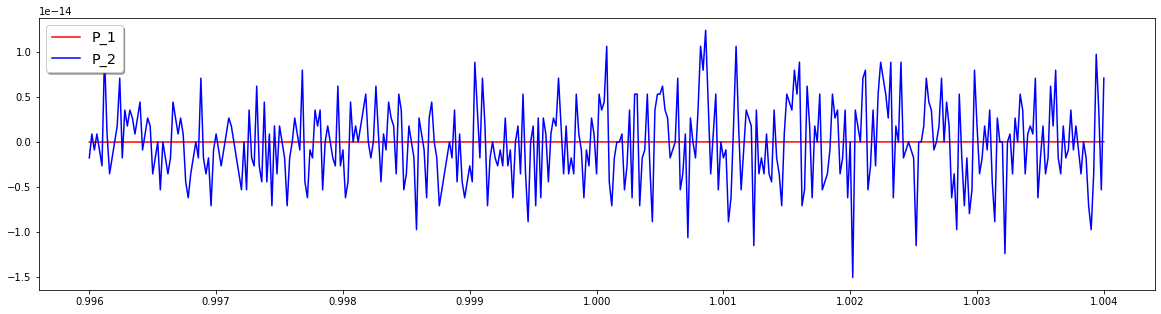

In [ ]:
# puntos igualmente espaciados
a=1-4E-3
b=1+4E-3
print(a)
x = np.arange(a, b, 4E-3/200)
p1= (x-1)**7
p2=x**7-7*x**6+21*x**5-35*x**4+35*x**3-21*x**2+7*x-1
plt.figure(figsize=(20, 5))
plt.plot(x, p1, 'r-',label='P_1')
plt.plot( x, p2, 'b-',label='P_2')
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

Por último notamos que, aunque el error de redondeo es pequeño al principio, en cálculos complejos puede acumular para ocasionar efectos **catastróficos**.


**EJEMPLO 1:**  Explosión del misil Ariane en Junio de 1996 por un **desbordamiento por exceso** en el computador del mismo.
https://www.bugsnag.com/blog/bug-day-ariane-5-disaster

**EJEMPLO 2:** La falla de una misión de un misil *American Patriot* durante la guerra del Golfo en 1991 debido a **errores de redondeo** en el cálculo de la trayectoria a seguir. 
https://www.iro.umontreal.ca/~mignotte/IFT2425/Disasters.html

A continuación calculamos la recursión $x_0=1, x_1=1/3, x_{n+1}=\frac{13}{3}x_n-\frac{4}{3}x_{n-1}$ de dos formas diferentes. Una usando directamente la definición de la recursión. La otra a partir de la formula análitica de la misma, que es $x_n=\frac{1}{3^n}$.

In [ ]:
x0=1
x1=1/3
for n in range(2,34):
  x2=(13/3)*x1-(4/3)*x0
  exac=np.power(1/3,n)
  print('Calculado={0:.15f}'.format(x2), '\t \t Exacto',exac)
  x0=x1
  x1=x2

Calculado=0.111111111111111 	 	 Exacto 0.1111111111111111
Calculado=0.037037037037036 	 	 Exacto 0.03703703703703703
Calculado=0.012345679012343 	 	 Exacto 0.012345679012345677
Calculado=0.004115226337436 	 	 Exacto 0.004115226337448558
Calculado=0.001371742112432 	 	 Exacto 0.0013717421124828527
Calculado=0.000457247370625 	 	 Exacto 0.00045724737082761756
Calculado=0.000152415789465 	 	 Exacto 0.0001524157902758725
Calculado=0.000050805260180 	 	 Exacto 5.0805263425290837e-05
Calculado=0.000016935074827 	 	 Exacto 1.693508780843028e-05
Calculado=0.000005644977344 	 	 Exacto 5.645029269476759e-06
Calculado=0.000001881468722 	 	 Exacto 1.8816764231589195e-06
Calculado=0.000000626394672 	 	 Exacto 6.272254743863065e-07
Calculado=0.000000205751947 	 	 Exacto 2.090751581287688e-07
Calculado=0.000000056398875 	 	 Exacto 6.969171937625627e-08
Calculado=-0.000000029940803 	 	 Exacto 2.3230573125418753e-08
Calculado=-0.000000204941979 	 	 Exacto 7.743524375139585e-09
Calculado=-0.000000848160

Observe que la columna de la izquierda, tiene hasta valore negativos y parece diverge a $-\infty$. Este es otro ejemplo de algoritmo inestable. 

Para terminar mencionaremos la librería sympy que permite realizar cálculo simbólico en lugar de cálculo numérico. Recuerden que en el cálculo numérico las variables en todo momento tiene valores particulares asignados los cuales corresponden a números de máquina que dependen del formato que se esté usando: precisión simple, precisión doble, e.t.c. 

Para terminar mencionaremos la librería sympy que permite realizar cálculo simbólico en lugar de cálculo numérico. Recuerden que en el cálculo numérico las variables en todo momento tiene valores particulares asignados los cuales corresponden a números de máquina que dependen del formato que se esté usando: precisión simple, precisión doble, e.t.c.
En los cálculos simbólicos las variables no tienen que tomar valores particulares y se pueden manipular solo restringiendo su comportamiento a reglas que aplican a conjuntos numéricos como por ejemplo: enteros, reales, complejos, matrices, e.t.c.


In [ ]:
import sympy as sp
x = sp.Symbol('x')
y = sp.Symbol('y')
sp.limit(sp.sin(x)/x, x, 0)

1

In [ ]:
sp.expand(sp.cos(x+y), trig=True)

-sin(x)*sin(y) + cos(x)*cos(y)

In [ ]:
 sp.diff(sp.sin(x)/sp.cos(x), x)

sin(x)**2/cos(x)**2 + 1

In [ ]:
sp.solve(x**4 - y, x)

[-y**(1/4), y**(1/4), -I*y**(1/4), I*y**(1/4)]

In [ ]:
A = sp.Matrix([[1,x,x**2], [1,1,x], [x**2,x**2,x]])

In [ ]:
z=sp.det(A)
z

x**4 - x**3 - x**2 + x

In [ ]:
p=sp.solve(z,x)
p

[-1, 0, 1]

**NOTA:** 
Tenga en cuenta que el formato entero (int ) de python no tiene una longitud fija y puede representar enteros grandes. Por ejemplo:
 


In [ ]:
23**100+21

14886191506363039393791556586559754231987119653801368686576988209222433278539331352152390143277346804233476592179447310859520222529876022

# Problemas

**PROBLEMA** ¿Cuánta memoria requiere guardar 100.000 números de punto flotante de precisión doble?¿Cuánta memoria requiere guardar una matriz de números de punto flotante dimensión 100.000 x 100.000?

**PROBLEMA** Los números de punto flotante en python son implementados usando la clase float. Es decir, además de la descripción en bits del número tenemos asociados a la una instancia de variable tipo float los los siguientes métodos y atributos para un dato float: as_integer_ratio, conjugate, fromhex, imag, is_integer, real .

Describa cada uno de estos métodos y atributos con ejemplos simples. 

La implementación del tipo de dato float en lenguaje C corresponde solo a la descripción en bits del número y no corresponde a una estructura u objeto. ¿Cuáles son las ventajas y desventajas de usar objetos?. 


**PROBLEMA(Sullivan)** Con $x_0=1/10$, considere la sucesión,  
$$
x_{n+1}=\left\{\begin{array}{ll}
2x_n & \mbox{ si } x_n\in \left[0,\frac{1}{2}\right] \\
2x_n-1 &  \mbox{ si } x_n\in \left(\frac{1}{2},1\right].
\end{array}\right.
$$
para $n=1,2,\dots$. Calcule $x_1,x_2,x_3,\dots,x_{50}$ de forma análitica y despues usandoun código en python. Compare y explique.

Repetir pero ahora iniciando con $x_0=1/8$. Compare y explique. 

**PROBLEMA** Explique la falla del Ariane. Muestre cálculos numéricos para soportar su explicación. 

**PROBLEMA**  Explicar la falla del American Patriot. Muestre cálculos numéricos para soportar su explicación.

**PROBLEMA** Ensaye calcular las funciones $$f(x)=\sqrt{x^2+1}-1 \quad g(x)=\frac{x^2}{\sqrt{x^2+1}+1}$$
Use valores pequeños como $x=8^{-1},8^{-2},8^{-3},\dots$. Explique los resultados. Note que, análiticamete,  $f(x)=g(x)$.


**PROBLEMA(Quarteroni,Saleri,Gervasio)** El lector puede implementar el calculo de la siguiente recurrencia que approxima $\pi$ (formula de Franc,ois Viète) y estudiar su estabilidad/instabilidad numérica, 
$$z_1=2, \,\,z_{n+1}=2^{n-1/2}\sqrt{1-\sqrt{1-4^{1-n}z_n^2}},\,\,n=2,3,\dots. $$



**PROBLEMA(Stewart)** Repita el experimento arriba con la recurrencia $x_1=\frac{1}{3}, x_2=\frac{1}{12}$,  $x_{k+1}=2.25x_k-0.5x_{k-1}$.

**PROBLEMA** Presente un ejemplo, adicional  a los presentados en clase, de algortimos inestables o problemas mal condicionados. 

**PROBLEMA** Repita el experimento arriba con $P(x)=(x-1)^7$. Agrege el siguiente método 
$$  P(x)= ((((((x-7)x+21)x-35)x+35)x-21)x+7)x-1 $$
Verifique esta formula. Implemente y comente los resultados. Esta forma de calcular polinimios es conocida como el esquema de Horner.


**PROBLEMA(Stoer)** Considere los siguientes algoritmos. Algoritmo 1
$$s=p^2,\quad t=s+q,\quad u=\sqrt{t},\quad y=-p+u  $$
y el altoritmo 2, 
$$s=p^2,\quad t=s+q,\quad u=\sqrt{t}, \quad v=p+u,\quad y=q/v $$
Escriba $y$ como función de $p$ y $q$. Compare los resutados de estos dos algoritmos cuando $p=1000$,  $q=0.0018000000081$. Explique los resultados. ¿Cuál es mas confiable para estos valores de $p$ y $q$?

**PROBLEMA** Considere el siguiente codigo
```
x=np.sqrt(1/9)
print("x={0:.60f}".format(x))
```
que dá como resultado 
x=0.333333333333333314829616256247390992939472198486328125000000.

Explique, tan detalladamente como le sea posible, lo que  está pasando. 
Compare con el siguiente código para el cual es más dificil saber la respuesta exacta. 
```
x=np.sqrt(0.1)
print("x={0:.60f}".format(x))
```
¿Cuántos decimales puede garantizar este cálculo?

**PROBLEMA** Describa los siguientes tipos de datos :numpy.half,   numpy.float16, numpy.single, numpy.double, numpy.longdouble, numpy.csingle, numpy.cdouble, numpy.clongdouble.

# Referencias




*   Sullivan, Eric. Numerical Methods: An Inquiry-Based Approach With Python. 2020.
*   Bulirsch, Roland, Josef Stoer, and J. Stoer. Introduction to numerical analysis. Vol. 3. Heidelberg: Springer, 2002.
*  Stewart, Gilbert W. Afternotes on numerical analysis. Society for Industrial and Applied Mathematics, 1996.
*  Quarteroni, Alfio, Fausto Saleri, and Paola Gervasio. Scientific computing with MATLAB and Octave. Vol. 3. Berlin: Springer, 2006.


